# Algorithm Implementation
First, I implement the regular gradient descent model to calculate the loss function. In the fit() function, I first reset the history and obtain the data points and the number of features from the given dataset. Then, I initialized a random initial weight vector. In the main loop, the gradient is calculated for computing the loss and updating the weight. When the losses become indistinguishable, we consider finding the minimalized loss and thus terminate the loop.

Based on the regular gradient descent model, we implement one of its key variants, the stochastic gradient descent with an optional momentum feature. In the fit_stochasitic() function, I compute the stochastic gradient by picking a random subset and computing the corresponding gradient. Specifically, we use a nested for loop. The outer loop iterates through the max number of epochs input by the user by shuffling them first. The inner loop iterates through arrays of equal size indicated by the user. Each array is a batch. Within each batch, we calculate the stochastic gradient and conduct the update.

# Performance Check 
Initiate autoreload and import packages.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random

from gradient import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Generate a 2D dataset.

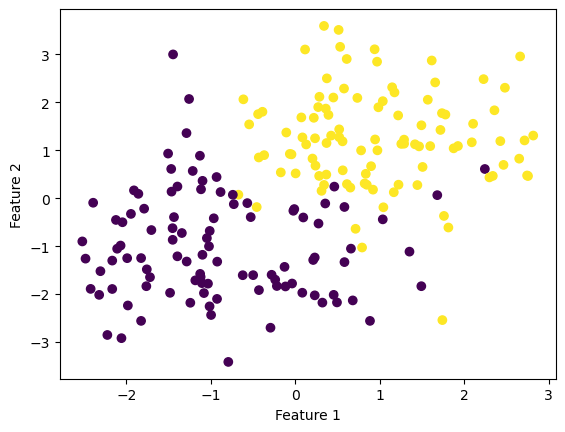

In [4]:
np.random.seed(300)
# make the data
X, y = make_blobs(n_samples = 200, n_features = 2, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Fit the model for regular gradient and check history.

In [5]:
# fit the model
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.01, max_epochs = 1000)

# inspect the fitted value of w
LR.w 

# check history
print(f"{LR.score_history[-10:] = }")
print(f"{LR.loss_history[-10:] = }")

LR.score_history[-10:] = [0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925]
LR.loss_history[-10:] = [0.22110667250928606, 0.22106582072749664, 0.22102504977749868, 0.22098435942579706, 0.22094374943980186, 0.2209032195878236, 0.22086276963906903, 0.2208223993636367, 0.22078210853251268, 0.22074189691756615]


Seems right. Now we fit the models for stochasitc gradient (with momentum), stochasitc gradient (no momentum), and regular gradient. Then, we plot all three on the loglog plot to see how they converge over iterations.

LR.loss_history[-10:] = [0.1891885675258715, 0.18918135337947276, 0.1891732709523959, 0.1891664490195526, 0.18916397195720727, 0.18915691574954063, 0.1891532721564178, 0.18914877910489547, 0.1891452449340078, 0.18914101648260434]
LR.loss_history[-10:] = [0.1891892578397053, 0.1891862554287734, 0.1891776959845537, 0.18917244702257963, 0.18916378484579333, 0.18915910372864198, 0.18915339492464875, 0.18914785080072152, 0.18914212274131073, 0.18913854088299892]
100
LR.loss_history[-10:] = [0.2547344581927334, 0.25400204588594855, 0.253283648059068, 0.25257887196972795, 0.25188733932459734, 0.2512086856255283, 0.2505425595506183, 0.24988862236804774, 0.24924654738070146, 0.24861601939972083]
num_steps = 100


Text(0, 0.5, 'Loss')

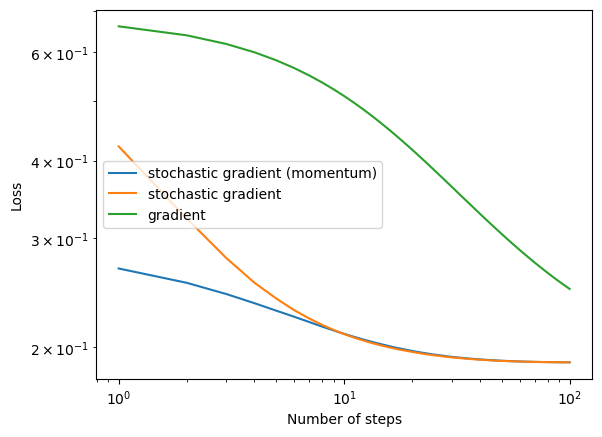

In [6]:
np.random.seed(666)
# stochasitc gradient (with momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .05) 

# check history
print(f"{LR.loss_history[-10:] = }")

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05)
# check history
print(f"{LR.loss_history[-10:] = }")

# plot
num_steps = len(LR.loss_history)
print(num_steps)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# gradient
LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)

# check history
print(f"{LR.loss_history[-10:] = }")

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
print(f"{num_steps = }")

# plot loglog
plt.loglog()

legend = plt.legend()
plt.xlabel("Number of steps")
plt.ylabel("Loss")

All three models converge given small enough learning rate. In general, the regular gradient model converges slower than the stochastic gradient models and might need more epochs to find a good solution.

# Experiments

It's time to play with the parameters even more and see how the learning rate, batch size, momentum, and feature numbers!

1. A case in which gradient descent does not converge to a minimizer because the learning rate is too large.

When the learning rate (step size) is too large, as shown below, the model does not converge any more but oscillates instead.

num_steps = 100


Text(0, 0.5, 'Loss')

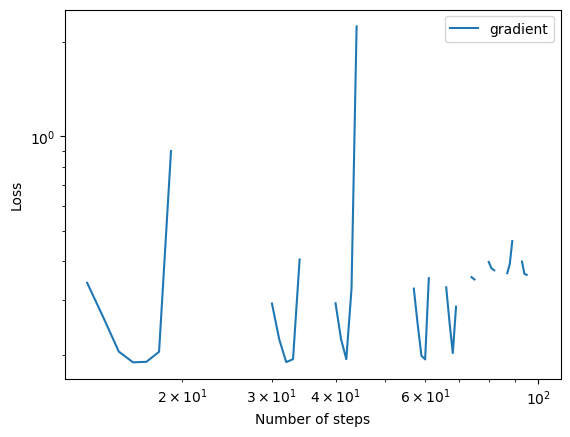

In [7]:
np.random.seed(306)
#gradient
LR = LogisticRegression()
LR.fit(X, y, alpha = 100, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
print(f"{num_steps = }")

# plot loglog
plt.loglog()

legend = plt.legend()
plt.xlabel("Number of steps")
plt.ylabel("Loss")

2. A case in which the choice of batch size influences how quickly the algorithm converges.

The smaller the batch, the more quickly the algorithm converges.

53
100


Text(0, 0.5, 'Loss')

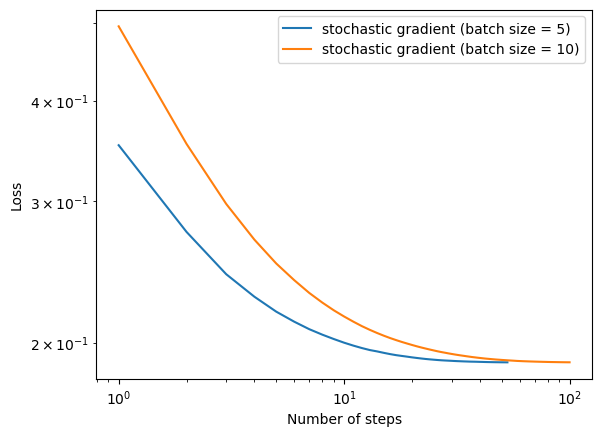

In [8]:
np.random.seed(307)
# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 5, 
                  alpha = .05)

num_steps = len(LR.loss_history)
print(num_steps)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch size = 5)")

# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05)

num_steps = len(LR.loss_history)
print(num_steps)
#print(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch size = 10)")

# plot loglog
plt.loglog()

legend = plt.legend()
plt.xlabel("Number of steps")
plt.ylabel("Loss")

3. A case in which the use of momentum significantly speeds up convergence.

I tried multiple random seeds, while sometimes the stochastic gradient models with and without momentum display similar converging rate, the one with momentum sometimes out perform the one without. Therefore, in general, we can conclude that the use of momentum significantly speeds up convergence.

42
36


Text(0, 0.5, 'Loss')

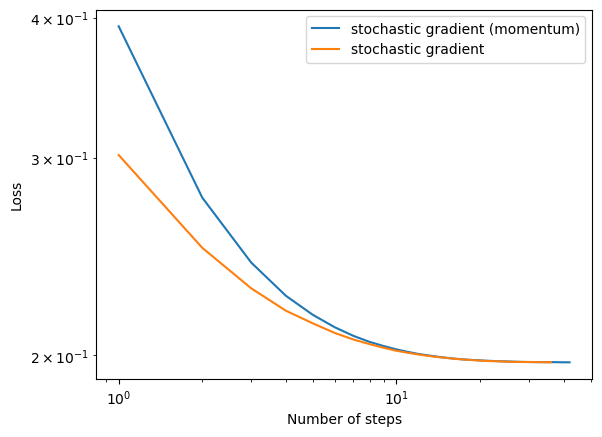

In [10]:
np.random.seed(312)
# make the data (10 features)
X2, y2 = make_blobs(n_samples = 200, n_features = 2, centers = [(-1, -1), (1, 1)])

# stochasitc gradient (with momentum)
LR = LogisticRegression()
LR.fit_stochastic(X2, y2, 
                  m_epochs = 100, 
                  momentum = True, 
                  batch_size = 4, 
                  alpha = .07) 

num_steps = len(LR.loss_history)
print(num_steps)
# print(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X2, y2, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 4, 
                  alpha = .07)

num_steps = len(LR.loss_history)
print(num_steps)
# print(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# plot loglog
plt.loglog()

legend = plt.legend()
plt.xlabel("Number of steps")
plt.ylabel("Loss")